# Subplots: Apple & Microsoft stock

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

apple =  pd.read_csv("AAPL_historical_stock.csv")
msft = pd.read_csv("MSFT_historical_stock.csv")

apple.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-07-01,126.900002,126.940002,125.989998,126.599998,30128600,126.599998
1,2015-06-30,125.570000,126.120003,124.860001,125.430000,43849800,125.430000
2,2015-06-29,125.459999,126.470001,124.480003,124.529999,48911400,124.529999
3,2015-06-26,127.669998,127.989998,126.510002,126.750000,42111000,126.750000
4,2015-06-25,128.860001,129.199997,127.500000,127.500000,31816700,127.500000


In [113]:
msft.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-07-01,44.459999,45.230000,44.099998,44.450001,28337200,44.450001
1,2015-06-30,44.709999,44.720001,43.939999,44.150002,35214100,44.150002
2,2015-06-29,45.040001,45.230000,44.360001,44.369999,33899600,44.369999
3,2015-06-26,45.650002,46.279999,45.029999,45.259998,45610900,45.259998
4,2015-06-25,46.029999,46.060001,45.500000,45.650002,20569500,45.650002


In [114]:
# Convert Date columns to datetime64 dtype.
apple["Date"] = pd.to_datetime(apple["Date"])
msft["Date"] = pd.to_datetime(msft["Date"])

apple.set_index("Date", inplace=True)
msft.set_index("Date", inplace=True)
apple.sort_index(inplace=True)
msft.sort_index(inplace=True)

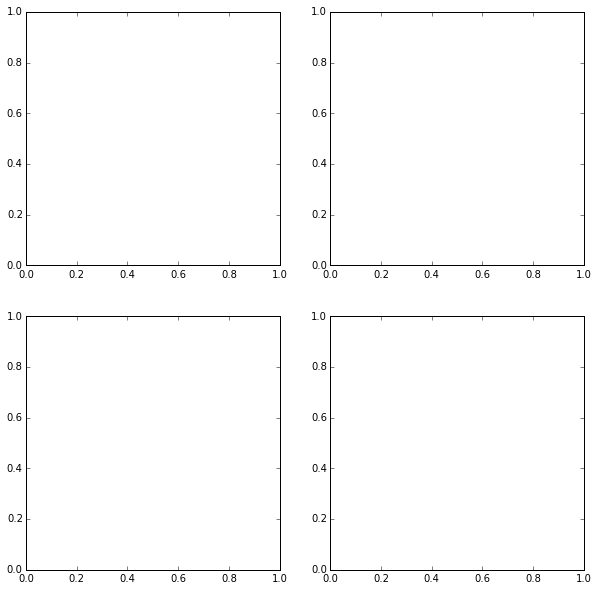

In [115]:
# Create a Figure instance, and Axes objects in a 2 row by 1 column layout.
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [116]:
# Function to plot intervals.
def plot_interval(start_date, end_date):
    # Use to_datetime() to try to convert string values to datetime values.
    start_datetime = pd.to_datetime(start_date)
    end_datetime = pd.to_datetime(end_date)
    
    # Since these DataFrames have a DateTime index, you can use slicing for selection / filtering.
    apple_interval = apple[start_datetime:end_datetime]
    msft_interval = msft[start_datetime:end_datetime]
    
    # Plot the low and high prices on top 2 plots.
    ax1.plot(apple_interval.index, apple_interval["Low"])
    ax1.plot(apple_interval.index, apple_interval["High"])
    ax1.set_title("Apple: High and Low")
    ax2.plot(msft_interval.index, msft_interval["Low"])
    ax2.plot(msft_interval.index, msft_interval["High"])
    ax2.set_title("Microsoft: High and Low")
    
    # Plot trading volumes on bottom 2 plots.
    ax3.plot(apple_interval.index, apple_interval["Volume"])
    ax3.set_title("Apple: Trading Volume")
    ax4.plot(msft_interval.index, msft_interval["Volume"])
    ax4.set_title("Microsoft: Trading Volume")
    fig.autofmt_xdate()

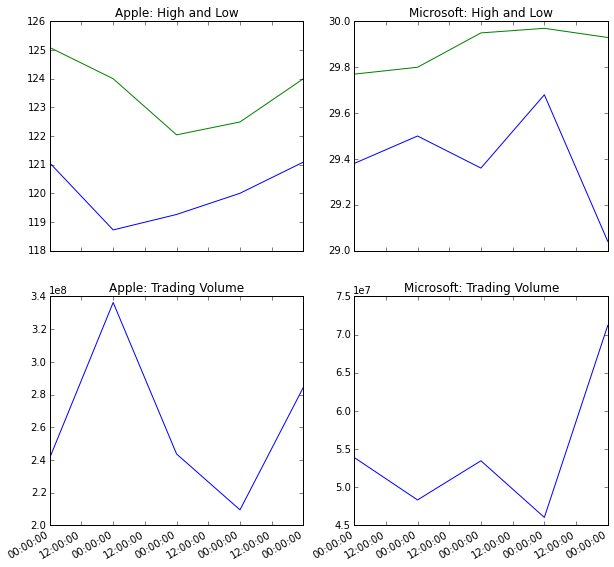

In [117]:
# IPhone Launch Week - June 29, 07
plot_interval("6/25/2007", "7/1/2007")
fig

# Subplots: recreating pair plots using Matplotlib only

In [118]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head(5)

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [119]:
# Drop any rows with `NaN` in place.
recent_grads.dropna(inplace=True)

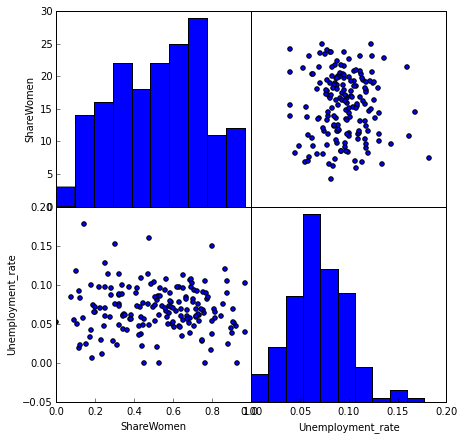

In [164]:
fig_rg = plt.figure(figsize=(7,7))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])
ax1_rg.set_ylabel("ShareWomen")
ax1_rg.get_xaxis().tick_top()
ax1_rg.get_xaxis().set_visible(False)
ax1_rg.get_yaxis().tick_left()

# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
ax2_rg.get_yaxis().set_visible(False)
ax2_rg.get_xaxis().set_visible(False)

# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
ax3_rg.set_xlim(0.0, 1.0)
ax3_rg.set_xlabel("ShareWomen")
ax3_rg.set_ylabel("Unemployment_rate")
ax3_rg.get_xaxis().tick_bottom()
ax3_rg.get_yaxis().tick_left()

# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])
ax4_rg.set_xlabel("Unemployment_rate")
ax4_rg.get_yaxis().set_visible(False)
ax4_rg.get_xaxis().tick_bottom()
ax4_rg.set_xlim(0.0, 0.20)

# Remove space between sub plots.
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Grouped bar plots

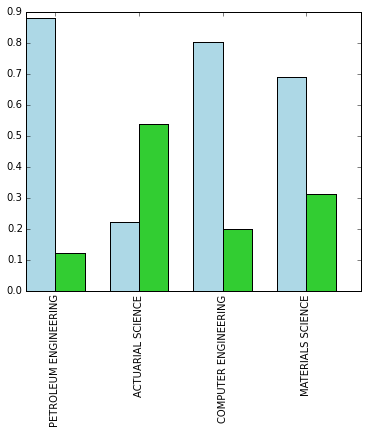

In [205]:
import numpy as np

recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

def grouped_bar_plots(majors_list):
    n = len(majors_list)
    locs = np.arange(n)
    specific_rows = recent_grads[recent_grads["Major"].isin(majors_list)]
    width = 0.35
    men_proportions = specific_rows["ShareMen"].tolist()
    women_proportions = specific_rows["ShareWomen"].tolist()
    
    # Plot both bar plots.
    ax1_rg2.bar(locs, men_proportions, width=width, color='lightblue')
    ax1_rg2.bar(locs + width, women_proportions, width=width, color="limegreen")
    
    # X ticks and labels
    ax1_rg2.set_xticks(locs + width)
    ax1_rg2.set_xticklabels(majors_list, rotation=90)
    
    
majors = ["PETROLEUM ENGINEERING", "ACTUARIAL SCIENCE", "COMPUTER ENGINEERING", "MATERIALS SCIENCE"]
grouped_bar_plots(majors)

plt.show()

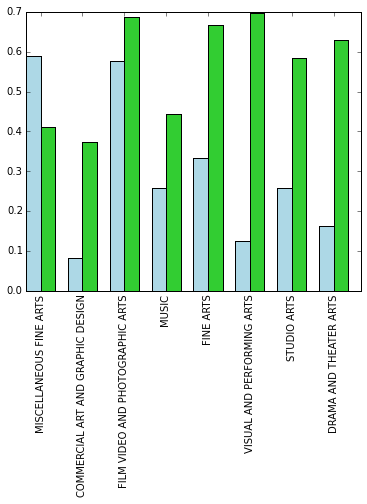

In [204]:
fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

majors_2 = recent_grads[recent_grads["Major_category"] == "Arts"]["Major"].tolist()
grouped_bar_plots(majors_2)
plt.show()